# "Fake" vs. "Real" news: NLP

The topic of "fake" versus "real" news is one that's become more pressing as social media continues to evolve and information is more rapidly spread. The concept of news itself is not new and is a fundamental aspect of modern-day democracies. Journalists work to hold powerful entities and figures accountable and are supposed to be an ally of the people. Yet, distrust of the media is extremely common due to the nature of present-day society and officials constantly calling the media into question. Harmful conspiracies and propaganda aren't new but now have a platform to thrive and be spread among social sites. Companies and people are able to mask "pink slime," or garbage-level information, as quality journalism. This is a problem, as most people aren't entirely media literate and can't tell the difference -- but a computer can.

#### The purpose of this notebook is to use Natural Language Processing to train a model to tell the difference between "fake" and "real" news.

## Table of Contents

#### 1. Importing libraries and data 
#### 2. Data cleaning
#### 3. Feature Extraction
#### 4. Training the model
#### 5. Analyzing and exploring some more
#### 6. Conclusion + takeaways


## 1. Importing libraries and  data 

Let's import all the libraries we'll need to import and analyze the data.

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now, let's import our csv files of both "fake" and "real" news datasets. The dataset is from: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=True.csv. Then, we'll take a look at the heads of our csv files.

In [10]:
fake = pd.read_csv('Fake.csv', index_col=0)
real = pd.read_csv('True.csv', index_col=0)

In [11]:
fake.head()

,text,subject,date
title,,,
Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
Drunk Bragging Trump Staffer Started Russian Collusion Investigation,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES),"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
Pope Francis Just Called Out Donald Trump During His Christmas Speech,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
real.head()

,text,subject,date
title,,,
"As U.S. budget fight looms, Republicans flip their fiscal script",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
U.S. military to accept transgender recruits on Monday: Pentagon,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
Senior U.S. Republican senator: 'Let Mr. Mueller do his job',WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
FBI Russia probe helped by Australian diplomat tip-off: NYT,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
Trump wants Postal Service to charge 'much more' for Amazon shipments,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


The datasets both contain four columns which include: the article's title, the article's body text, the subject of the news, and the date the article was published. It's a fairly straightforward dataset, which is great to work with.

Let's check the info, describe, and value_counts aspects of the datasets.

In [13]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23481 entries,  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing to 10 U.S. Navy Sailors Held by Iranian Military – Signs of a Neocon Political Stunt
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     23481 non-null  object
 1   subject  23481 non-null  object
 2   date     23481 non-null  object
dtypes: object(3)
memory usage: 733.8+ KB


In [14]:
fake.describe()

,text,subject,date
count,23481,23481,23481
unique,17455,6,1681
top,,News,"May 10, 2017"
freq,626,9050,46


In [17]:
fake.value_counts()

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [15]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21417 entries, As U.S. budget fight looms, Republicans flip their fiscal script to Indonesia to buy $1.14 billion worth of Russian jets
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     21417 non-null  object
 1   subject  21417 non-null  object
 2   date     21417 non-null  object
dtypes: object(3)
memory usage: 669.3+ KB


In [16]:
real.describe()

,text,subject,date
count,21417,21417,21417
unique,21192,2,716
top,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,8,11272,182


In [19]:
real.value_counts()

text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

## 2. Data cleaning

I'm going to drop the "Subject" columns to make it easier for our model to figure out what is real and what is fake. It'll also be ideal for me to concatenate the two types of news, but I'll go and add more labels to identify everything more clearly.

In [20]:
real['label'] ='real'
fake['label'] = 'fake'

In [21]:
news_data = pd.concat([fake,real],axis=0)
news_data = news_data.sample(frac=1).reset_index(drop=True)
news_data.drop('subject',axis=1)

,text,date,label
0,"DETROIT (Reuters) - President Barack Obama, fa...","January 20, 2016",real
1,BERLIN (Reuters) - German Chancellor Angela Me...,"September 27, 2017",real
2,WASHINGTON (Reuters) - U.S. Interior Secretary...,"June 12, 2017",real
3,YANGON/BANGKOK (Reuters) - In many ways Wa Lon...,"December 19, 2017",real
4,MOSCOW (Reuters) - The Russian Navy on Thursda...,"September 14, 2017",real
...,...,...,...
44893,For a crash course in why reality television s...,"November 16, 2016",fake
44894,MOSCOW (Reuters) - Russia expects all terrori...,"October 30, 2017",real
44895,(Reuters) - Highlights of the day for U.S. Pre...,"February 14, 2017",real
44896,(This November 28 story has been corrected to...,"November 28, 2017",real


Let's split up our dataset into test vs. training!

First, I'll import train_test_split

In [23]:
from sklearn.model_selection import train_test_split

I'll run the train_test_split and check the heads of our training data as well as the length of X_train

In [25]:
X = news_data['text']
y = news_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
X_train.head()

33882    Since 1890, The Arizona Republic, now the stat...
33401    KIEV (Reuters) - Ukraine s state security serv...
28105    Donald Trump s White House is in more turmoil ...
28470    WASHINGTON (Reuters) - In a move certain to pl...
3593     WASHINGTON (Reuters) - Republican presidential...
Name: text, dtype: object

In [27]:
y_train.head()

33882    fake
33401    real
28105    fake
28470    real
3593     real
Name: label, dtype: object

In [28]:
len(X_train)

31428

## 3. Feature Extraction¶

I will be using tf-idf term weighting as the feature to extract from the texts.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
my_tfidf = TfidfVectorizer(stop_words='english',max_df=0.8)

let's fit the vectorizer and then transform X_train into a tf-idf matrix. 
Then, we will use that same vectorizer to transform the X_test

In [38]:
tfidf_train = my_tfidf.fit_transform(X_train)
tfidf_test = my_tfidf.transform(X_test)

tfidf_train

<31428x105028 sparse matrix of type '<class 'numpy.float64'>'
	with 4822484 stored elements in Compressed Sparse Row format>

## 4. Training the model

I will be using PassiveAggressiveClassifier

In [39]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [40]:
pa_clf = PassiveAggressiveClassifier(max_iter=50)
pa_clf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

We can use the same algorithm to the test dataset to see how well it performs.

The accuracy of prediction is 99.34%.

The F1 score is 0.993.



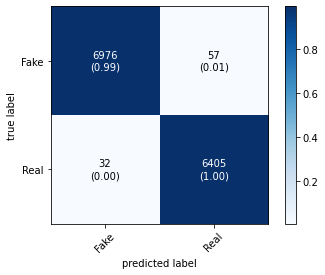

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from mlxtend.plotting import plot_confusion_matrix


y_pred = pa_clf.predict(tfidf_test)

conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True,
                      class_names=['Fake', 'Real'])
accscore = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test,y_pred,pos_label='real')

print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
print('The F1 score is {:.3f}.\n'.format(f1score))

The model does a great job at predicting if news is fake, with a 99.34% level of accuracy. The F1 score is also extremely high, as well, with a score of 0.993.

## 5. Analyzing and exploring some more

I'm going to explore: 

 - What criteria the model learned to make it incredibly accurate

- If this model can be applied well to other articles that aren't in the data set or if this dataset had a particular characertistic that made it stand out

To begin with, let's see what the model's criteria was.

In [46]:
from sklearn.utils.extmath import density
from sklearn.pipeline import make_pipeline

In [47]:
print("Dimensionality (i.e., number of features): {:d}".format(pa_clf.coef_.shape[1]))
print("Density (i.e., fraction of non-zero elements): {:.3f}".format(density(pa_clf.coef_)))

Dimensionality (i.e., number of features): 105028
Density (i.e., fraction of non-zero elements): 0.500


The algorithm found that less than half of the features were not useful in determining whether or not an article is real. But let's examine the other features:

Non-zero weight sorting:

In [48]:
weights_nonzero = pa_clf.coef_[pa_clf.coef_!=0]
feature_sorter_nonzero = np.argsort(weights_nonzero)
weights_nonzero_sorted =weights_nonzero[feature_sorter_nonzero]

Plotting

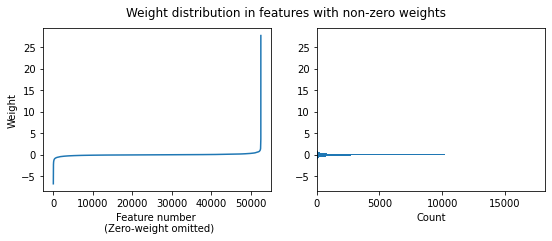

In [50]:
fig, axs = plt.subplots(1,2, figsize=(9,3))
sns.lineplot(data=weights_nonzero_sorted, ax=axs[0])
axs[0].set_ylabel('Weight')
axs[0].set_xlabel('Feature number \n (Zero-weight omitted)')

axs[1].hist(weights_nonzero_sorted,
            orientation='horizontal', bins=500,)
axs[1].set_xlabel('Count')

fig.suptitle('Weight distribution in features with non-zero weights')

plt.show()

It looks like even with the features that have non-zero weights, a lot of them have a value close to zero. This isn't shocking, as there were almost one-hundred thousand tokens, so most of them were probably useless for the task at hand.

But what tokens were  useful?

### Let's extract "Indicator" tokens

In [53]:
tokens = my_tfidf.get_feature_names()
tokens_nonzero = np.array(tokens)[pa_clf.coef_[0]!=0]
tokens_nonzero_sorted = np.array(tokens_nonzero)[feature_sorter_nonzero]

num_tokens = 10
fake_indicator_tokens = tokens_nonzero_sorted[:num_tokens]
real_indicator_tokens = np.flip(tokens_nonzero_sorted[-num_tokens:])

In [54]:
fake_indicator = pd.DataFrame({
    'Token': fake_indicator_tokens,
    'Weight': weights_nonzero_sorted[:num_tokens]
})

real_indicator = pd.DataFrame({
    'Token': real_indicator_tokens,
    'Weight': np.flip(weights_nonzero_sorted[-num_tokens:])
})

In [55]:
print('The top {} tokens likely to appear in fake news were the following: \n'.format(num_tokens))
display(fake_indicator)

print('\n\n...and the top {} tokens likely to appear in real news were the following: \n'.format(num_tokens))
display(real_indicator)

The top 10 tokens likely to appear in fake news were the following: 



,Token,Weight
0,read,-6.736483
1,featured,-6.130743
2,image,-6.092392
3,gop,-5.640964
4,just,-5.116356
5,sen,-4.463410
6,getty,-4.397292
7,rep,-4.370485
8,mr,-4.157349
9,com,-4.074806




...and the top 10 tokens likely to appear in real news were the following: 



,Token,Weight
0,reuters,27.733056
1,said,8.642050
2,washington,5.071318
3,nov,4.687407
4,republican,3.705176
5,tuesday,3.294907
6,saying,3.250470
7,thursday,3.211036
8,wednesday,3.020546
9,rival,2.816452


In [56]:
fake_contain_fake = fake.text.loc[[np.any([token in body for token in fake_indicator.Token])
                                for body in fake.text.str.lower()]]
real_contain_real = real.text.loc[[np.any([token in body for token in real_indicator.Token])
                                for body in real.text.str.lower()]]

print('Articles that contained any of the matching indicator tokens:\n')

print('FAKE: {} out of {} ({:.2f}%)'
      .format(len(fake_contain_fake), len(fake), len(fake_contain_fake)/len(fake) * 100))
print(fake_contain_fake)

print('\nREAL: {} out of {} ({:.2f}%)'
      .format(len(real_contain_real), len(real), len(real_contain_real)/len(real) * 100))
print(real_contain_real)

Articles that contained any of the matching indicator tokens:

FAKE: 21715 out of 23481 (92.48%)
title
 Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing               Donald Trump just couldn t wish all Americans ...
 Drunk Bragging Trump Staffer Started Russian Collusion Investigation                         House Intelligence Committee Chairman Devin Nu...
 Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’    On Friday, it was revealed that former Milwauk...
 Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)                On Christmas day, Donald Trump announced that ...
 Pope Francis Just Called Out Donald Trump During His Christmas Speech                        Pope Francis used his annual Christmas Day mes...
                                                                                                                    ...                        
McPain: John McCain Furious That 

### Some noticable points:

- Fake news tens to use Getty Images, most likely because a lot of fake articles aren't necessarily done by actual journalists, which means they need to find photos elsewhere.

- Weekdays are often included in real news, like "Tuesday","Wednesday",etc. because AP style prefers articles to state the day it took place if it happened that week, or the actual date of the event if it was prior.

- The categories went beyond politics, but many indicator terms seemed relevant to U.S. Politics. This includes terms like "gop", "sen", "republican", and more.

- "gop" is often used more in fake news that real news, while "republican" is more often used in real news. This is likely because AP style tells journalists to refer to the party as "Republicans."

### Other questions:

- Why are "read" and "featured" the top two fake-news indicator tokens? Is it because an author was trying to claim that the story is real because it's been read a lot and featured elsewhere?

- The same question goes for "nov" and "washington", which perhaps infers that a lot of fake articles came around election time in November and discussed the month and the capitol a lot.

- It is clear that Reuters is reputable, but a lot of articles begin with a "City Name (Reuters)" which the algorithim must have identified as real. I wonder if the algorithm could still tell if an article is real if this identifier was removed.

These are all speculations, but it would be interesting to see how these terms are actually used within the test. But that is beyond the scope of this project at hand.

## 6. Conclusion + takeaways

I used the TfidVectorizer and PassiveAggressiveClassifier algorithms to find "fake news" within the dataset. It was extremely accurate and able to identify the "fake news" at a consistently high rate with a high f1 score.